## ITCS 3162 Data Mining Project 4:
## Clustering with Diabetes Indicators 

### Shan Raheim 

#### **Kaggle Link for the Dataset:**

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

#### **Problem Introduction**

This project will revolve around symptoms regarding diabetes and related characteristics of individuals that either have diabetes, type 1 or 2, or not at all. The problem that will be addressed will be using clustering based on characteristics like high blood pressure, high cholesterol and others to determine if a person has diabetes type 1 or 2 or not at all. For reference Type 1 diabetes is where a person’s pancreas produces little to no insulin and Type 2 diabetes is where a person constantly has high blood sugar levels. Millions of people are affected by diabetes from different sources whether it be hereditary or caused due to being overweight or another way. By using clustering based on the characteristics included in this study we can see if people are possibly at risk of diabetes which can help prevent it or diagnose it since it can affect one's lifestyle drastically.
rastically.

#### **What is Clustering?**

Clustering is a type of unsupervised learning within machine learning. Its focus is to group items and data together forming “clusters” or groups based off of similarities within the data points. K-Means Clustering is a type of clustering where you select the number of clusters (k), randomly select k points to start as the initial centroids, then assign the data points to the nearest centroids, thenupdate the centroids by recalculating the mean of the data points in the clusters to get the new clusters and repeat this until there are no more major differences in the centroids after updating. Agglomerative clustering is where you treat each data point as its own cluster then you merge the closest clusters then update the distances between the new clusters and previous ones. Lastly you repeat this until you get the number of clusters you want or when only one cluster remains.



In [67]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### **Data Introduction**

In [4]:
data_filepath = "../ITSC3162/diabetes_indicators.csv"
data = pd.read_csv(data_filepath)
df = pd.DataFrame(data)

df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


Above is a sample from the Kaggle dataset. It has 22 columns that are indicators for diabetes gathered from a telephone survey from the CDC. It includes different indicators recorded from the people who participated including blood pressure, fruit consumption, and more. For some columns you notice that the values are either 0 or 1, for usage 0 represents no regarding the topic or false and 1 represents yes or true for the topic. In the Diabetes_012 column 0 = no diabetes, 1 = prediabetes, and 2 = diabetes. For the cholCheck column it whether if the person has had a cholesterol check in the past 5 years, the smoker column was based on if the person smoked 100 cigarettes in their life (100 cigarettes = 5 packs of cigarettes), the HeartDiseaseorAttack column asked if the person has had coronary heart disease of myocardial infarction, the PhysActivity column recorded if the person has had any form of physical activity in the past 30 days, the fruits and veggies columns recorded if the person has had either in the past 30 days respectively. The HvyAlcoholConsump was based on if the person is a heavy drinker, if they are adult men having more than 14 drinks a week and if they are adult women having more than 7 drinks a week. The NoDocbcCost column recorded if there was a time in the past year when they needed to see a doctor but could not because of the cost. GenHlth ranked the person's general health on a scale of 1-5 where 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor. For MentHlth and PhysHlth they represented in the past 30 days if the person described the respective health as not good. DiffWalk represents if a person has difficulty walking or climbing stairs. For sex 0 = female and 1 = male. For the Age column there are 13 levels, 1 = 18 - 24, 9 = 60 - 64, 13 = 80 or older, the others were not specifically listed. Education  was split into a scale from 1-6, 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate). Lastly Income was represented on a scale of 1 - 8, 1 = < 10,000, 5 = less than 35,000, 8 = 75,000 or more, the others were not listed.  



### **Data Pre-Preprocessing**

Due to this dataset already being clean there was not much pre-processing I needed to do. 

### **Data Visualization**

<Axes: title={'center': "Amount of People within the Dataset who Don't have Diabetes, Prediabetes, or a Type of Diabetes"}, xlabel='Diabetes_012', ylabel='Count'>

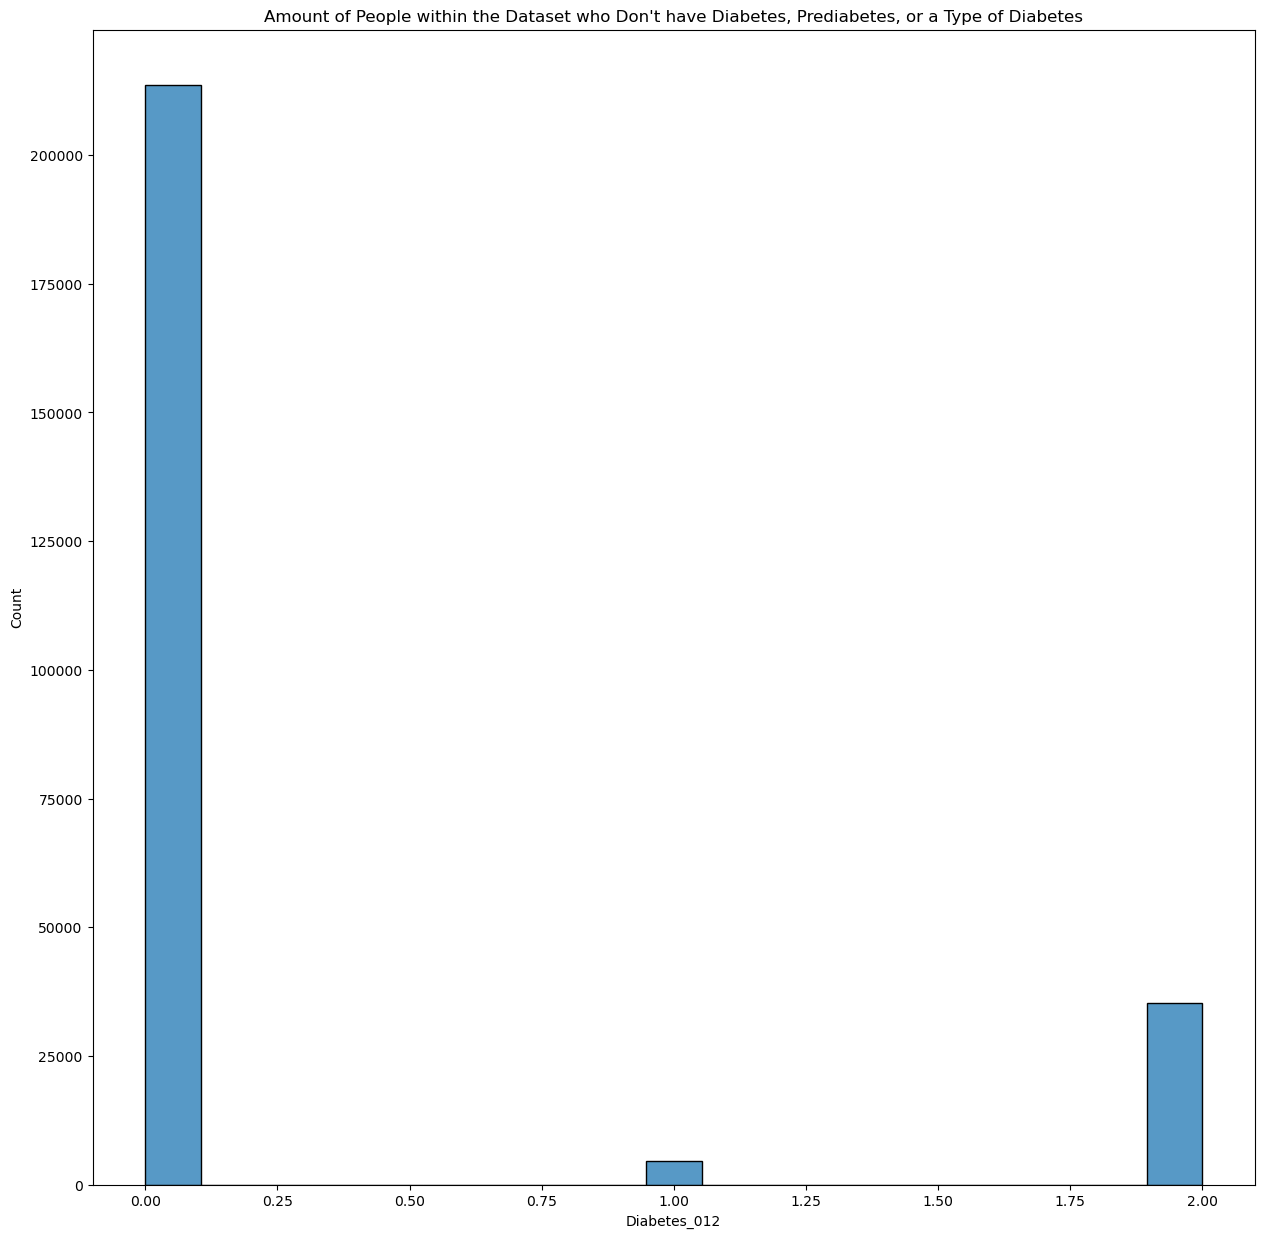

In [20]:
plt.figure(figsize=(15,15))

plt.title("Amount of People within the Dataset who Don't have Diabetes, Prediabetes, or a Type of Diabetes") 
        
sb.histplot(df['Diabetes_012'])

Just for a simple visualization for the project to gauge the number of people in each group whether they do not have diabetes, prediabetes or a form of diabetes I used a histogram. This visualization shows us within this study most of the survey respondants do not have any form of diabetes while there is a big difference in the number of people who do or have prediabetes. This can impact about data by explaining any skews in the  clustering when we experiment since it can explain some relationships with a certain characteristic and the number of points in a cluster.

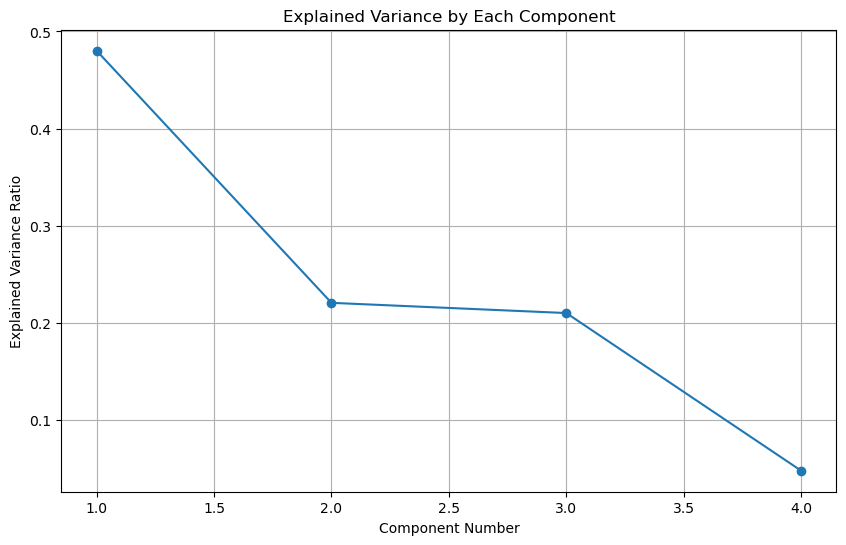

In [71]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(df)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Component Number")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Each Component")
plt.grid(True)
plt.show()



From the clustering demo we did in class, I will be utilizing PCA to determine what components from the data that are the most impactful or better explained by the most amount of variance caused by the components. This can help clustering activity by looking at the more important components. Shown above it shows that either 1 or 2 components is the flattening out point for the amount of components that have decent variance but since there is one point where the graph flattens out at 1 component I will use 2 since it continues to go down after that and for the sake of comparison with multiple components before something is left out that can be useful. 

In [73]:
pca_df = pd.DataFrame(pca.transform(df))

I have decided to use K-Means Clustering for this project since it will be easier to group people together based off of similar data points when clusters begin to form. Using similar characteristics from the dataset above, different ones can be chosen when determining clusters to help distinguish which ones are related to the diabetes groups. 

C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

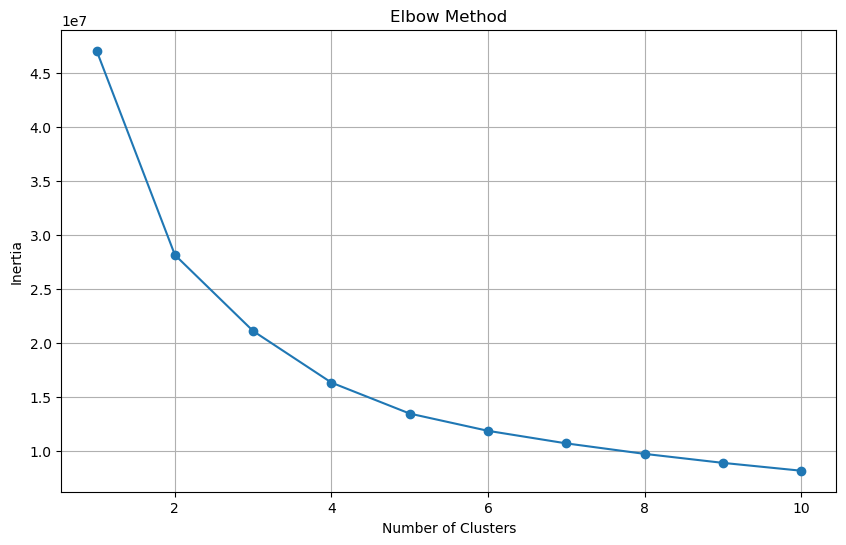

In [75]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

From the elbow plot above, the 'elbow' point where the graph begins to flatten out can be either 2 or 3 or possibly 4, but I will be choosing 3 for the number k clusters.

In [79]:
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(pca_df)

C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

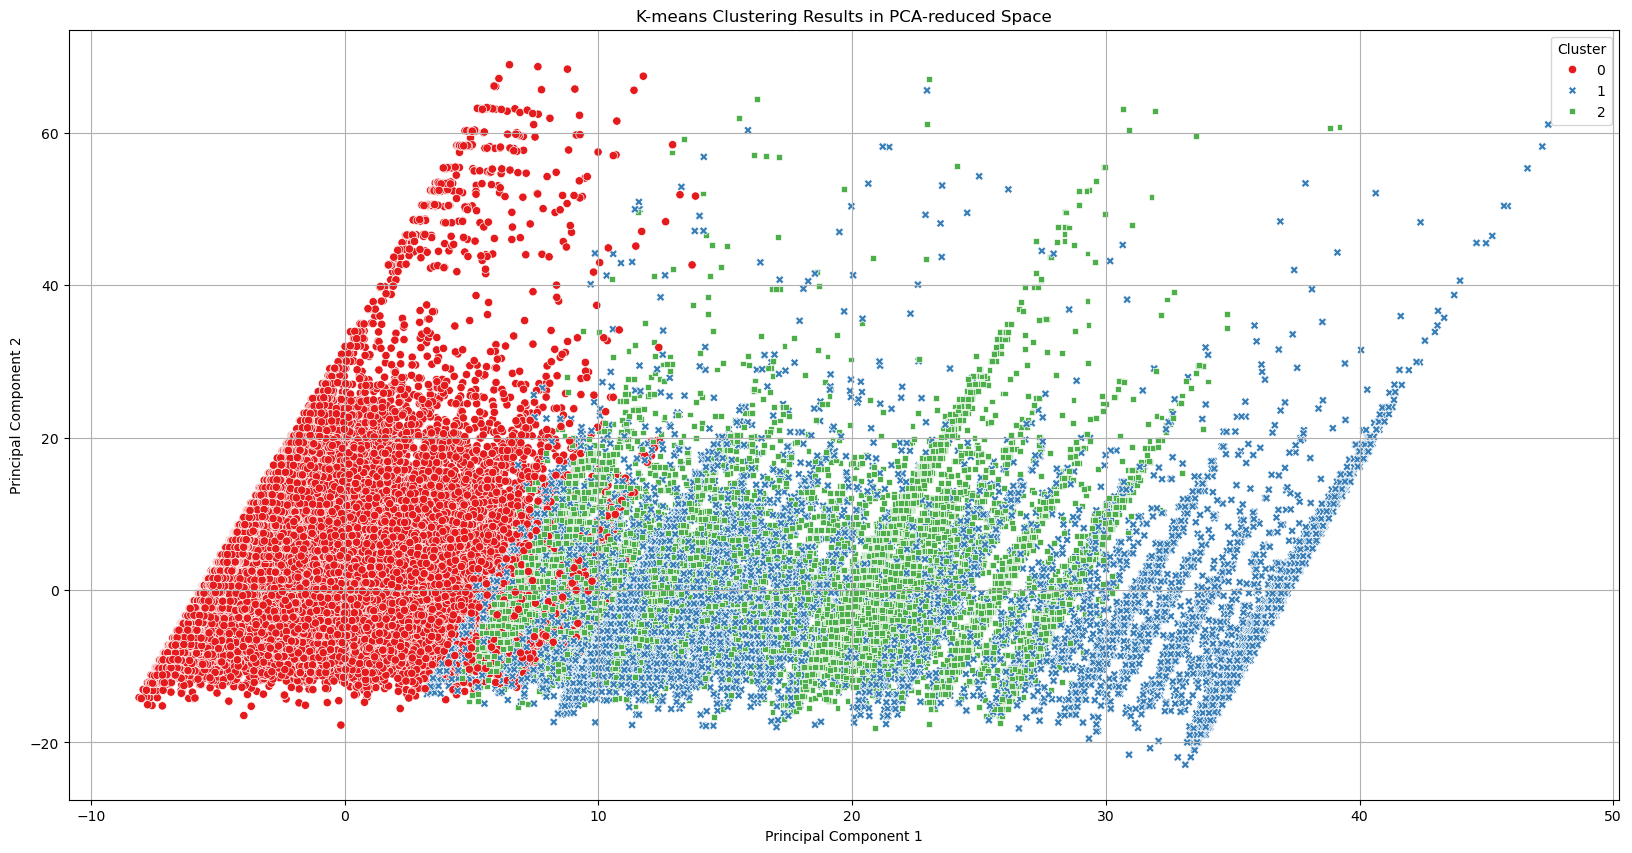

Cluster Centroids in PCA-reduced Space:
         PC1       PC2        PC3       PC4
0  -3.883866  0.290967   0.028383  0.009022
1  20.622799 -2.895400  14.186986 -0.593038
2  17.171245 -0.200490 -11.655083  0.398478


In [89]:
df['Clusters'] = kmeans.predict(pca_df)


plt.figure(figsize=(20, 10))
sb.scatterplot(x=pca_df[0], y=pca_df[1], hue=df['Clusters'], palette='Set1', style=df['Clusters'])
plt.title('K-means Clustering Results in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(pca_df.shape[1])])
print("Cluster Centroids in PCA-reduced Space:")
print(centroids)

The graph above shows the variance for the components included with the first principal component being on the x-axis and second most important principal component being on the y-axis. The red cluster on the left is more separated from the other two showing it is more distinct from the other two but the blue and green cluster overlap some. This means they had some similarity but there is still separation between the 2 and overall all 3 meaning they are all distinct in their own ways. The red cluster's data points are more tightly packed while the other two have some more space between the points meaning they have more variability in the data points. Using commonalities from the histogram plot at the beginning the red cluster is most likely the group that has no form of diabetes while blue can a form of diabetes and green prediabetes since it overlaps some with the red and blue clusters making sense since prediabetes could have similarities with both groups due to being in the 'middle' of the two.   

C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


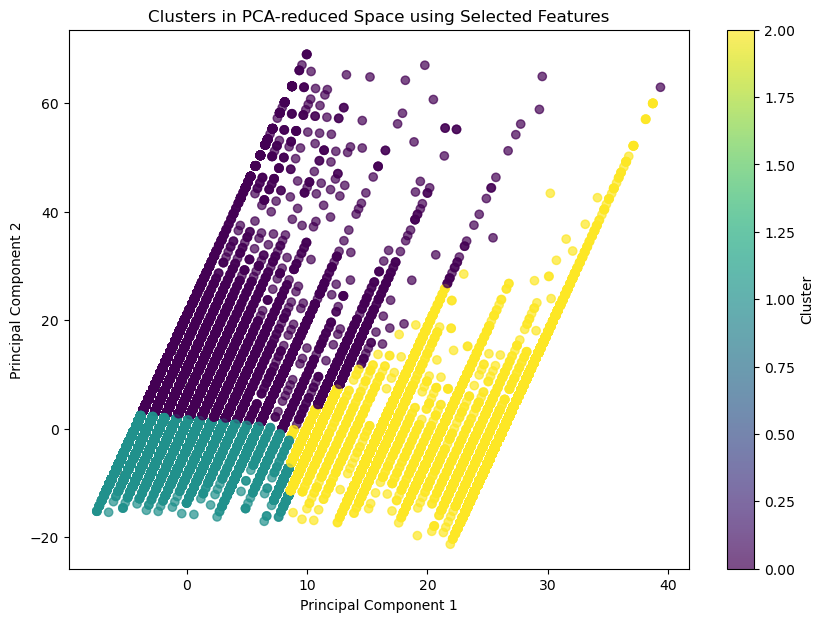

In [97]:
selected_features = ['Diabetes_012', 'BMI', 'PhysHlth']
df_subset = df[selected_features]

pca = PCA(n_components=2, random_state=42)
pca_df = pd.DataFrame(pca.fit_transform(df_subset), columns=['PC1', 'PC2'])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)

pca_df['Cluster'] = kmeans.predict(pca_df)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in PCA-reduced Space using Selected Features')
plt.colorbar(scatter, label='Cluster')
plt.show()

Above I selected what I think could be 3 key indicators for diabetes including whether the person has a form of diabetes, no diabetes, or prediabetes. Since the clusters are distinguishable it means that these features have an impact on the clustering with the PCA in play. Moving along principal component 1 and 2 on their respective graph indicate differences in possible diabetes conditions, a person's physical health, and BMI. 





#### **Impact**

Depending on what features were selected but in my case where I selected diabetes, physical health, and BMI the PCA can be adjusted to differentiate clusters.  By looking at separations in the graph people can determine if the features have significant impact on the clustering of the data points. Looking further into the features can help interpret what characteristics impact diabetes since they could be grouped along with multiple similar data points that represent a person. Actions can be taken to prevent the development of diabetes by analyzing and comparing the different clusters created.  

#### **References**

https://www.cdc.gov/diabetes/about/index.html
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset